## Convolutional Neural Network (CNN)

A **Convolutional Neural Network (CNN)** is a type of deep learning model designed to automatically **extract features** from grid-like data, such as images. CNNs are widely used in image classification, object detection, and other computer vision tasks.

### Key Components

#### 1. Input Layer
- Accepts images as 3D arrays: **Height x Width x Channels**.
- Example: RGB image → `(128, 128, 3)`.

#### 2. Convolutional Layer (Conv2D)
- Uses **filters/kernels** to scan the input and detect features like edges, textures, and shapes.
- **Operation:** \( Z = X * W + b \)
- **Activation:** Often **ReLU** to introduce non-linearity.

#### 3. Pooling Layer (MaxPooling2D / AveragePooling2D)
- Reduces spatial dimensions of feature maps.
- **Max Pooling:** Takes the maximum value in a window.
- **Average Pooling:** Takes the average value.
- Reduces computation and adds **translation invariance**.

#### 4. Flatten Layer
- Converts 2D/3D feature maps into a 1D vector.
- Prepares data for fully connected layers.

#### 5. Fully Connected (Dense) Layer
- Standard neural network layers where each neuron is connected to all neurons in the previous layer.
- Performs classification based on extracted features.

#### 6. Output Layer
- **Activation depends on task:**
  - **Classification:** Softmax for multi-class, Sigmoid for binary.
  - **Regression:** Linear activation.

### Training Components

- **Optimizer:**  
  - An `optimizer` is an algorithm used to adjust the weights and biases of a neural network during training in order to minimize the loss function.
  - **Adam** is commonly used in CNNs.  
  - Combines **momentum** and **adaptive learning rates** for efficient training.

- **Loss Function:**  
  - **categorical_crossentropy** for multi-class classification tasks.  
  - Measures the difference between predicted probabilities and true labels.

- **Metrics:** Accuracy is typically used for classification.


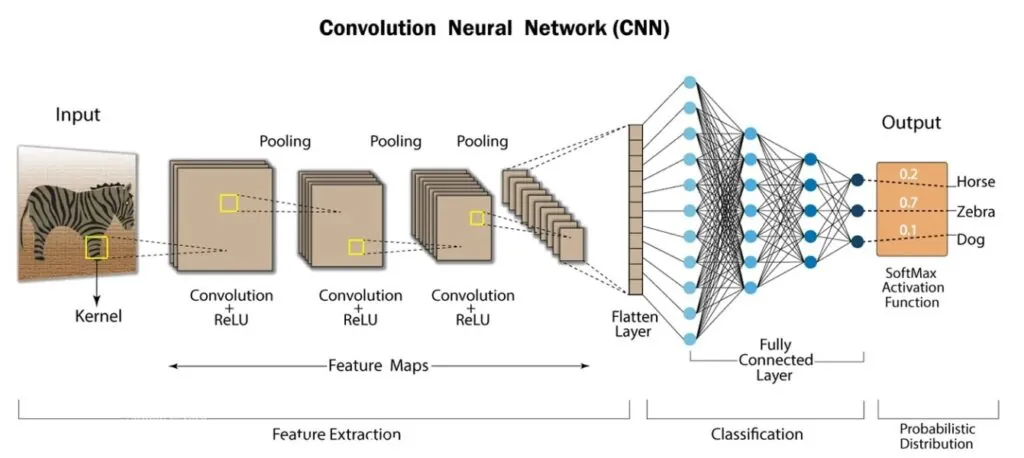

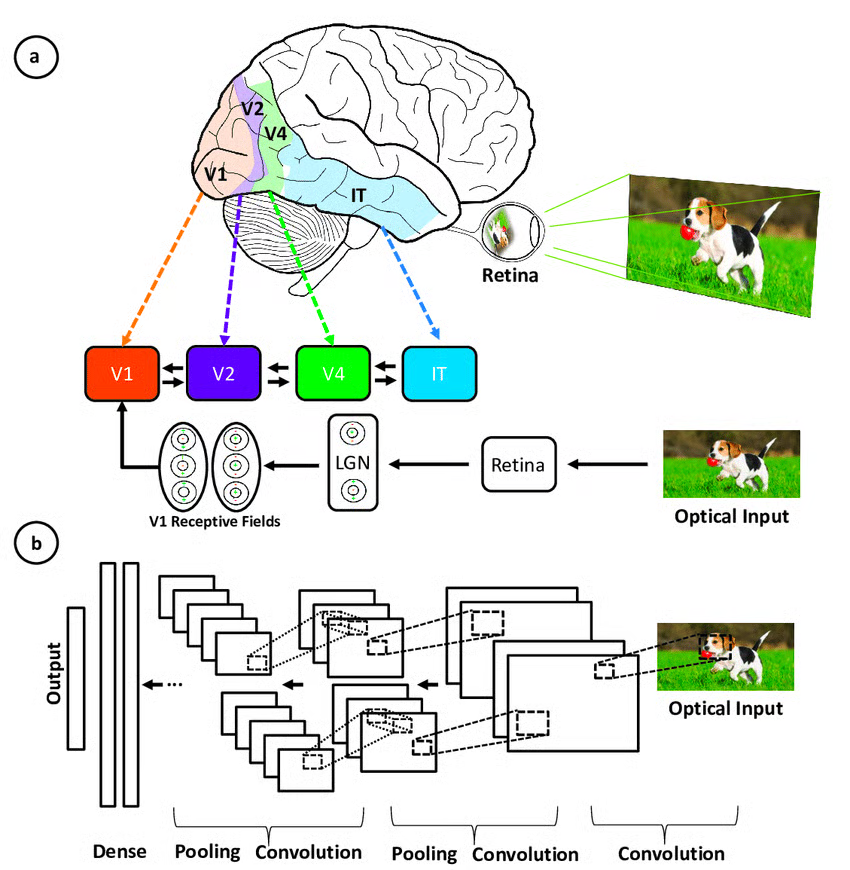

### CIFAR-10 CNN

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#### Download and prepare the CIFAR10 dataset
The `CIFAR10` dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 

The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 307s 2us/step


In [5]:
# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#### Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

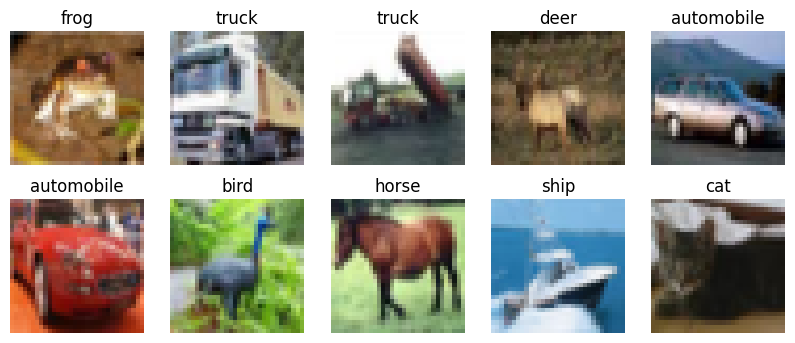

In [7]:
# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Display some sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

#### Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

#### Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [8]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Conv2D layer (Convolutional layer):

- 32 filters → the layer will learn 32 different feature maps (like edges, textures).
- (3,3) kernel size → small 3x3 sliding window for detecting features.
- Activation='relu' → introduces non-linearity and helps the network learn complex patterns.
- input_shape=(32,32,3) → input images are 32x32 pixels with 3 color channels (RGB).

Max Pooling layer:

- Reduces the spatial size of feature maps by taking the maximum value in each 2x2 window.
- Helps reduce computation and adds translation invariance.
- After this, feature maps become smaller (half the height and width).

Dense (fully connected) layer:
- 64 neurons, ReLU activation.
- Learns complex combinations of features extracted by convolutional layers.

Output layer:

- 10 neurons → one for each CIFAR-10 class.
- Softmax activation → converts outputs into probabilities that sum to 1.
- The class with the highest probability is the model’s prediction.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.4323 - loss: 1.5612 - val_accuracy: 0.5204 - val_loss: 1.3039
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.5760 - loss: 1.1924 - val_accuracy: 0.6142 - val_loss: 1.1183
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.6353 - loss: 1.0357 - val_accuracy: 0.6414 - val_loss: 1.0298
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6670 - loss: 0.9462 - val_accuracy: 0.6570 - val_loss: 0.9884
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.6939 - loss: 0.8782 - val_accuracy: 0.6932 - val_loss: 0.9164
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.7138 - loss: 0.8263 - val_accuracy: 0.6808 - val_loss: 0.9246
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.7286 - loss: 0.7739 - val_accuracy: 0.7202 - val_loss: 0.8498
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7422 - loss: 0.7328 - 

### Evaluate the model

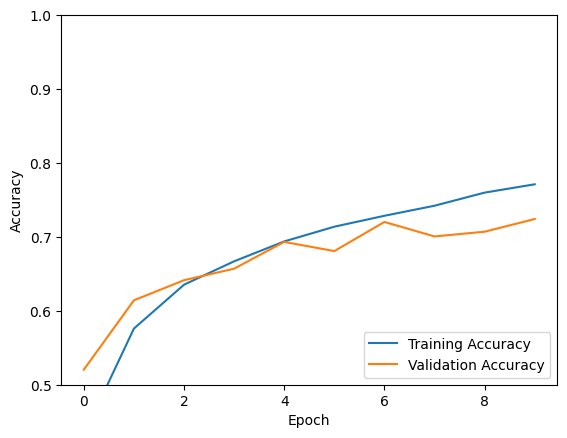

313/313 - 3s - 10ms/step - accuracy: 0.6997 - loss: 0.8736
Test Accuracy: 0.6997


In [13]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

In [14]:
# Make predictions on some test images
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


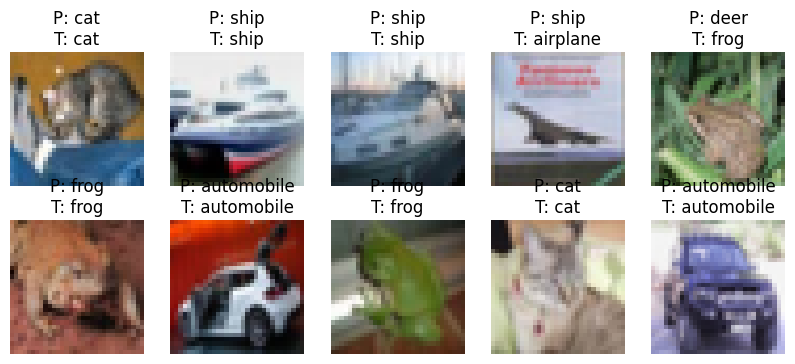

In [15]:
# Display test images with predicted labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    plt.title(f"P: {pred_label}\nT: {true_label}")
    plt.axis('off')
plt.show()